---
# Lab Task: Algorithmic Trading Strategy Analysis (Python) #
---

In this lab, you will build and evaluate a simple algorithmic trading strategy using historical **AMD** closing prices.

## Background

You have been asked to modify a trading algorithm so that it not only places trades, but also tracks:
- **Costs** (cash leaving when you buy)
- **Proceeds** (cash entering when you sell)
- **Profit/Loss (P/L)** and **Return on Investment (ROI)**

This simulates a real-world workflow: build the strategy → generate trades → report financial performance.  

## Objectives
1. Load and prepare AMD price data
2. Implement a simple trading algorithm based on daily price changes
3. Choose a trading period (start and end dates)
4. Calculate total P/L and ROI
5. Implement an extension strategy (**profit-taking** or **stop-loss**) and compare results
6. Summarise and discuss findings


---

### Step 0: Import Required Libraries

We will use:
- `pandas` for data manipulation
- `matplotlib` for plotting

> If you don't have these installed: `pip install pandas matplotlib`


In [ ]:
pip install pandas matplotlib

In [ ]:
##new coding block

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---
### Step 1: Data Loading

**Task**: Load AMD data from `AMD.csv` and create a DataFrame called `amd_df` with:
- `date` (as a datetime)
- `close` (Adjusted Close as numeric)

**Assumption**: Your CSV contains columns like `Date` and either `Adj Close` or `Adj.Close`.

> If your file uses a slightly different column name, adjust the code accordingly.


In [3]:
# Load data
# Expected columns include: Date, Adj Close (or Adj.Close)
raw = pd.read_csv('AMD.csv')

# Normalize column names to make life easier
cols = {c: c.strip().replace(' ', '').replace('.', '') for c in raw.columns}
raw = raw.rename(columns=cols)

# Build amd_df with (date, close)
amd_df = pd.DataFrame({
    'date': pd.to_datetime(raw['Date'], utc=True),
    # Try common variants: AdjClose / AdjClose, if not present you may need to change this
    'close': pd.to_numeric(raw.get('AdjClose', raw.get('AdjClose', raw.get('Close'))), errors='coerce')
})

amd_df = amd_df.dropna().sort_values('date').reset_index(drop=True)
amd_df.head()

,date,close
0,1980-03-17 05:00:00+00:00,3.145833
1,1980-03-18 05:00:00+00:00,3.031250
2,1980-03-19 05:00:00+00:00,3.041667
3,1980-03-20 05:00:00+00:00,3.010417
4,1980-03-21 05:00:00+00:00,2.916667


#### Plot the Closing Prices

**Task**: Plot `close` over time to visualise price movement.

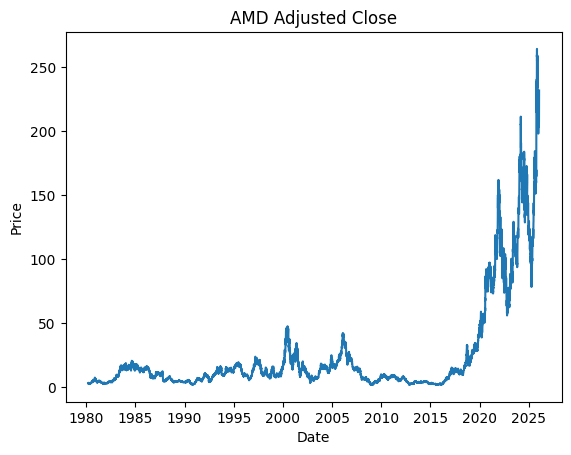

In [4]:
plt.figure()
plt.plot(amd_df['date'], amd_df['close'])
plt.title('AMD Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

---
### Step 2: Trading Algorithm 1 (Baseline)

**Task**: You will implement the trading algorithm described in the assignment.

#### Rules (baseline)
- Create / ensure these columns exist:
  - `trade_type` ("buy" / "sell" / "")
  - `costs_proceeds` (negative for buys, positive for sells)
  - `accumulated_shares` (running shares held)
- Use `share_size = 100` for each buy
- Buying logic:
  - If `previous_price == 0`, buy on the first row
  - Else, if today's price is **less** than yesterday's, buy
- Selling logic:
  - On the **last day**, sell **all** accumulated shares


In [ ]:
def trading_algorithm_1(df: pd.DataFrame, share_size: int = 100) -> pd.DataFrame:
    # Write your trading algorithm here
    return

---
### Step 3: Customise Your Trading Period

**Task**: Choose a start and end date within AMD's history and filter your dataset. Store this within `amd_df_filtered`.


In [ ]:
# Choose and filter the dataset for your trading period
amd_df_filtered = amd_df

---
### Step 4: Run Algorithm 1 on Your Period + Compute P/L and ROI

#### Definitions
- **Total Profit/Loss (P/L)**: sum of all entries in `costs_proceeds`
- **Capital Invested**: sum of all *buy* cashflows (negative numbers), then take the negative of that sum
- **ROI**:

$$\text{ROI} = \frac{\text{Total P/L}}{\text{Total Capital Invested}} \times 100$$


In [ ]:
def profit_and_loss(results: pd.DataFrame) -> float:
    return float(results['costs_proceeds'].sum())

def return_on_investment(total_pl: float, results: pd.DataFrame) -> float:
    capital_invested = results.loc[results['costs_proceeds'] < 0, 'costs_proceeds'].sum()
    # capital_invested is negative, so flip sign to make denominator positive
    if capital_invested == 0:
        return np.nan
    roi = (total_pl / (-capital_invested)) * 100
    return float(roi)

results_1_filtered = trading_algorithm_1(amd_df_filtered)
pl_1 = profit_and_loss(results_1_filtered)
roi_1 = return_on_investment(pl_1, results_1_filtered)

pl_1, roi_1

---
### Step 5: Strategy Extension (Choose 1)

Pick **ONE** of the following:

#### Option A: Profit-taking
Sell **half** your holdings if price rises by a threshold (e.g. 20%) above your **average purchase price**.

#### Option B: Stop-loss
Sell **half** your holdings if price falls by a threshold (e.g. 20%) below your **average purchase price**.

> In both cases, keep the baseline buy logic unless the stop-loss rules say otherwise.

In [ ]:
def profit_taking_strategy(df: pd.DataFrame, profit_take_percentage: float, share_size: int = 100) -> pd.DataFrame:
    # Write your trading algorithm here
    return df

results_2 = profit_taking_strategy(amd_df_filtered, profit_take_percentage=0.20)
pl_2 = profit_and_loss(results_2)
roi_2 = return_on_investment(pl_2, results_2)

pl_2, roi_2

In [ ]:
def stop_loss_threshold(df: pd.DataFrame, loss_threshold_percentage: float, share_size: int = 100) -> pd.DataFrame:
    # Write your trading algorithm here
    return df

results_2 = stop_loss_threshold(amd_df_filtered, profit_take_percentage=0.20)
pl_2 = profit_and_loss(results_2)
roi_2 = return_on_investment(pl_2, results_2)

pl_2, roi_2

---
### Step 6: Compare Strategies

**Task**: Compare Algorithm 1 vs your extension strategy on the same period.

Create a small results table showing:
- Total P/L
- ROI (%)

In [ ]:
comparison = pd.DataFrame([
    {'strategy': 'Algorithm 1 (baseline)', 'total_pl': pl_1, 'roi_percent': roi_1},
    {'strategy': 'Strategy 2 (extension)', 'total_pl': pl_2, 'roi_percent': roi_2},
])
comparison

---
## Discussion Prompt

In your write-up, answer:

1. Did your P/L and ROI improve over your chosen period?
2. Relate the result to a relevant market event (earnings, product announcements, macro news, etc.).
3. Explain *why* one strategy might outperform the other in a trending market vs a choppy market.